# Brazilian Rainforest Degradation Analysis
#### _How deforesation and forest fires are affecting the Amazon Rainforest, and what to expect in the future._

<img src="https://www.wwf.org.uk/sites/default/files/styles/social_share_image/public/2021-07/Amazon%20deforestation.jpg?itok=tZbyXhJ4" class="center" width=1000 height=200>

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Importing packages

## 1. Importing, Cleansing, and Understanding the Data

### 1.1 Importing reported fires in Brazil Amazon Regions

In [2]:
brazilfires = pd.read_csv("datasets/brazil_fires_1999-2019.csv")
brazilfires.head()

,year,month,state,latitude,longitude,firespots
0,2002,7,PARA,-7.272872,-51.737227,37926.0
1,2004,8,MATO GROSSO,-11.093895,-56.204235,24886.0
2,2007,8,MATO GROSSO,-11.018350,-56.162919,24779.0
3,2002,7,MATO GROSSO,-10.646819,-55.591126,23642.0
4,2005,7,PARA,-6.767477,-52.125310,23635.0


In [3]:
brazilfires.shape

(2108, 6)

In [4]:
brazilfires.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2108.0,2009.266603,5.962395,1999.000000,2004.000000,2009.000000,2014.000000,2019.000
month,2108.0,5.704459,3.432368,0.000000,3.000000,6.000000,9.000000,11.000
latitude,2108.0,-5.443965,4.851033,-14.431908,-9.946974,-5.808292,-2.609999,4.151
longitude,2108.0,-56.512885,7.383342,-73.085000,-62.376004,-55.869220,-50.398040,-44.188
firespots,2102.0,1156.083254,2942.110963,1.000000,15.250000,120.000000,751.250000,37926.000


#### 1.1.1 Cleansing Brazil Fires file

In [5]:
#Dropping duplicates in the case there are any.
brazilfires.drop_duplicates()

#Sorting by year and month.
brazilfires.sort_values(by=['year','month'], inplace=True)

#Checking for missing data
brazilfires.isnull().sum()

year         0
month        0
state        0
latitude     0
longitude    0
firespots    6
dtype: int64

In [6]:
#Filling in the missing datapoints
brazilfires['firespots'] = brazilfires['firespots'].fillna(brazilfires['firespots'].mean())

#Checking if any data is now missing.
brazilfires.isnull().sum()

year         0
month        0
state        0
latitude     0
longitude    0
firespots    0
dtype: int64

In [7]:
#Resetting the index.
brazilfires.reset_index(drop=True)

,year,month,state,latitude,longitude,firespots
0,1999,0,PARA,-2.474820,-48.546967,87.0
1,1999,0,MARANHAO,-2.257395,-45.487831,36.0
2,1999,0,MATO GROSSO,-12.660633,-55.057989,18.0
3,1999,0,RORAIMA,3.403225,-60.622853,15.0
4,1999,0,AMAZONAS,-2.371113,-59.899933,3.0
...,...,...,...,...,...,...
2103,2019,11,AMAPA,0.964258,-51.078726,62.0
2104,2019,11,RONDONIA,-10.809262,-62.890452,42.0
2105,2019,11,RORAIMA,2.856667,-60.431963,27.0
2106,2019,11,TOCANTINS,-6.769381,-48.475667,21.0


### 1.2 Importing Deforested Regions in Brazil

In [8]:
pivoted_deforest_brazil =  pd.read_csv("datasets/def_area_2004_2019.csv")

#### 1.2.1 Cleansing the Data

In [9]:
pivoted_deforest_brazil.shape

(16, 11)

In [10]:
pivoted_deforest_brazil.head()

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2005,592,775,33.0,922,7145,5899,3244,133,271,19014
1,2004,728,1232,46.0,755,11814,8870,3858,311,158,27772
2,2006,398,788,30.0,674,4333,5659,2049,231,124,14286
3,2008,254,604,100.0,1271,3258,5607,1136,574,107,12911
4,2013,221,583,23.0,403,1139,2346,932,170,74,5891


In [11]:
#Dropping "AMZ Legal" as it's not required in our analysis.
pivoted_deforest_brazil.drop('AMZ LEGAL', axis=1, inplace=True)

#Dropping any duplicates
pivoted_deforest_brazil.drop_duplicates()

#Sorting by "Ano/Estados" or Year
pivoted_deforest_brazil.sort_values(by='Ano/Estados', inplace=True)

#Checking for missing data
pivoted_deforest_brazil.isnull().sum()

Ano/Estados    0
AC             0
AM             0
AP             1
MA             0
MT             0
PA             0
RO             0
RR             0
TO             0
dtype: int64

In [12]:
#Filling in the missing data on "AP"
pivoted_deforest_brazil['AP'] = pivoted_deforest_brazil['AP'].fillna(pivoted_deforest_brazil['AP'].mean())

#Checking if any data is now missing.
pivoted_deforest_brazil.isnull().sum()

Ano/Estados    0
AC             0
AM             0
AP             0
MA             0
MT             0
PA             0
RO             0
RR             0
TO             0
dtype: int64

In [13]:
#Renaming columns to match "BrazilFires" dataset.
column_names = ["year", "ACRE", "AMAZONAS", "AMAPA", "MARANHAO","MATO GROSSO", "PARA", "RONDONIA", "RORAIMA", "TOCANTINS"]

pivoted_deforest_brazil.columns = column_names

In [14]:
#Reset Index
pivoted_deforest_brazil.reset_index(drop=True)

,year,ACRE,AMAZONAS,AMAPA,MARANHAO,MATO GROSSO,PARA,RONDONIA,RORAIMA,TOCANTINS
0,2004,728,1232,46.000000,755,11814,8870,3858,311,158
1,2005,592,775,33.000000,922,7145,5899,3244,133,271
2,2006,398,788,30.000000,674,4333,5659,2049,231,124
3,2007,184,610,39.000000,631,2678,5526,1611,309,63
4,2008,254,604,100.000000,1271,3258,5607,1136,574,107
5,2009,167,405,70.000000,828,1049,4281,482,121,61
6,2010,259,595,53.000000,712,871,3770,435,256,49
7,2011,280,502,66.000000,396,1120,3008,865,141,40
8,2012,305,523,27.000000,269,757,1741,773,124,52
9,2013,221,583,23.000000,403,1139,2346,932,170,74


In [15]:
#Data is pivoted, therefore I need to unpivot the data.
deforest_brazil = pivoted_deforest_brazil.melt(id_vars=['year'], var_name='state', value_name = 'deforested_area')

In [16]:
deforest_brazil.head()

,year,state,deforested_area
0,2004,ACRE,728.0
1,2005,ACRE,592.0
2,2006,ACRE,398.0
3,2007,ACRE,184.0
4,2008,ACRE,254.0


### 1.3 Merging the datasets

In [17]:
degredation_brazil = pd.merge(brazilfires,deforest_brazil, on=['state','year'])
degredation_brazil.head()

,year,month,state,latitude,longitude,firespots,deforested_area
0,2004,0,PARA,-2.370078,-50.867593,875.0,8870.0
1,2004,1,PARA,-3.508194,-51.670944,36.0,8870.0
2,2004,2,PARA,-3.461724,-49.875931,29.0,8870.0
3,2004,3,PARA,-3.256098,-52.223689,61.0,8870.0
4,2004,4,PARA,-3.472446,-49.818306,193.0,8870.0


 ## 2. Analysing our Data

### 2.1 Analysis of Brazilian Fires

#### 2.1.1 Per Year

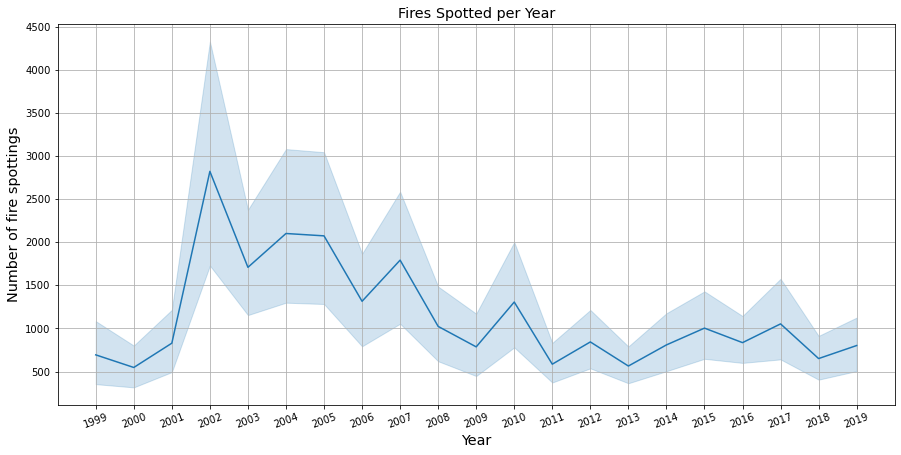

In [18]:
plt.figure(figsize=(15,7))

year = range(1999,2020)

sns.lineplot(data=brazilfires, x='year', y='firespots')
plt.title("Fires Spotted per Year", size="x-large")
plt.xlabel("Year" ,size="x-large")
plt.ylabel("Number of fire spottings" ,size="x-large")
plt.xticks(year,rotation="20")
plt.grid()

#### 2.1.2 Per Month

([<matplotlib.axis.XTick at 0x2969d031ee0>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

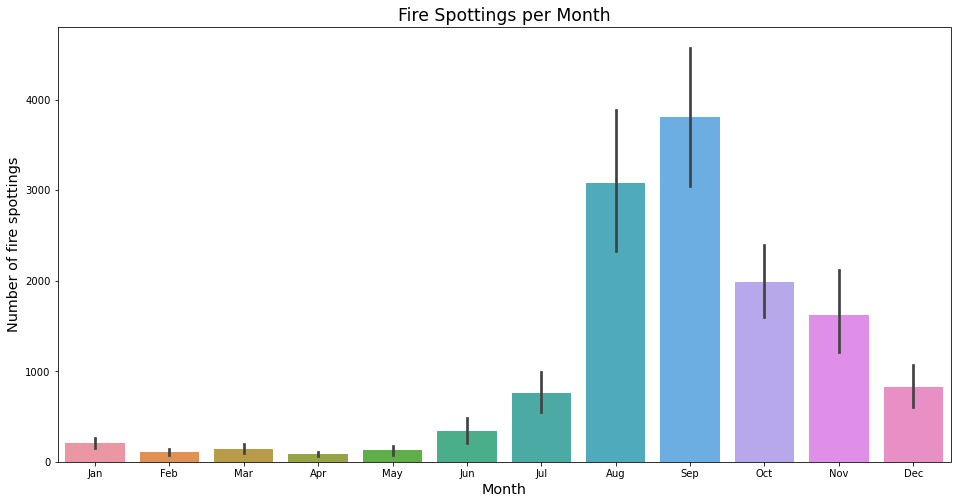

In [38]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
## This ensures that the X Ticks follows a specific label.

plt.figure(figsize=(16,8))

sns.barplot(data=brazilfires, x='month', y='firespots')
plt.title("Fire Spottings per Month", size="xx-large")
plt.xlabel("Month" ,size="x-large")
plt.ylabel("Number of fire spottings" ,size="x-large")
plt.xticks(ticks=brazilfires['month'].unique(),labels=month)


#### 2.1.3 Per State

Text(0, 0.5, 'Brazilian State')

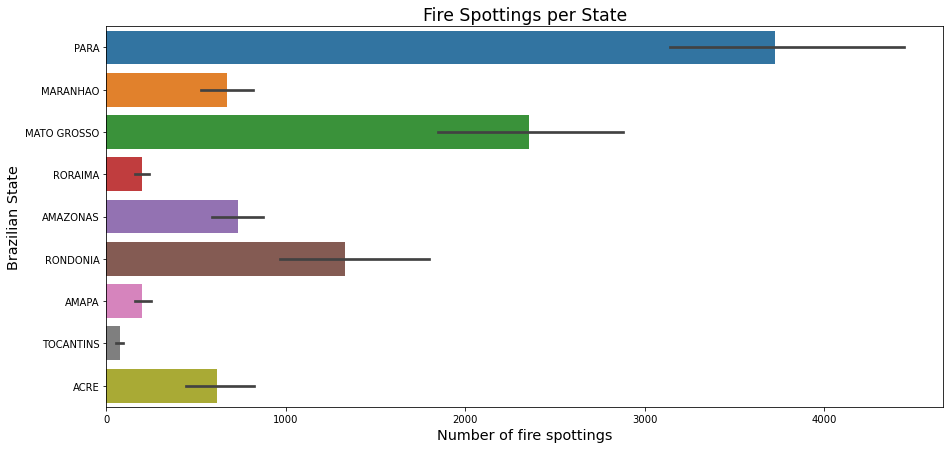

In [20]:
plt.figure(figsize=(15,7))
sns.barplot(data=brazilfires, x='firespots', y='state')

plt.title("Fire Spottings per State", size="xx-large")
plt.xlabel("Number of fire spottings" ,size="x-large")
plt.ylabel("Brazilian State" ,size="x-large")


In [168]:
sorted_states = (brazilfires[['state','firespots']].groupby('state', as_index=False).sum().sort_values('firespots',ascending=False)['state'].values)
## This line sorts the states from highest to lowest based on firespots.
## I create a new dataframe called "sorted states"

Text(0, 0.5, 'Brazilian State')

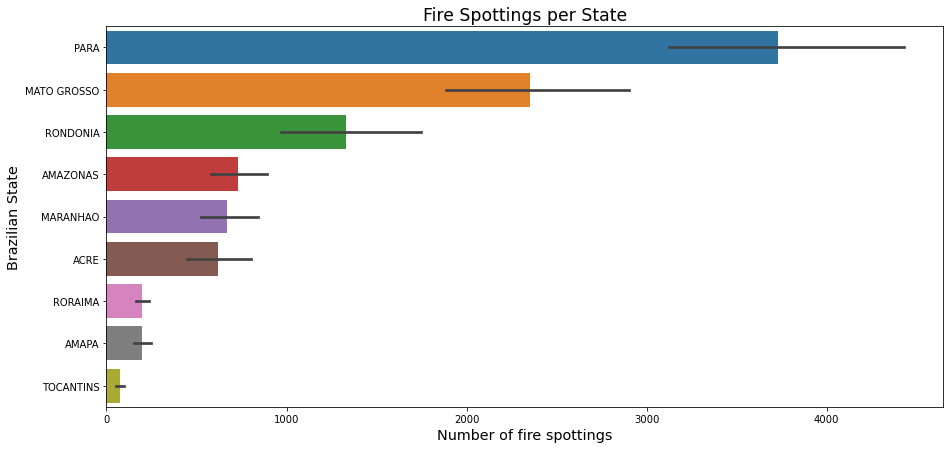

In [169]:
plt.figure(figsize=(15,7))
sns.barplot(data=brazilfires, x='firespots', y='state', order=sorted_states)

plt.title("Fire Spottings per State" ,size="xx-large")
plt.xlabel("Number of fire spottings" ,size="x-large")
plt.ylabel("Brazilian State" ,size="x-large")

### 2.2 Analysing Brazilian Deforestation

#### 2.2.1 Per Year Analysis

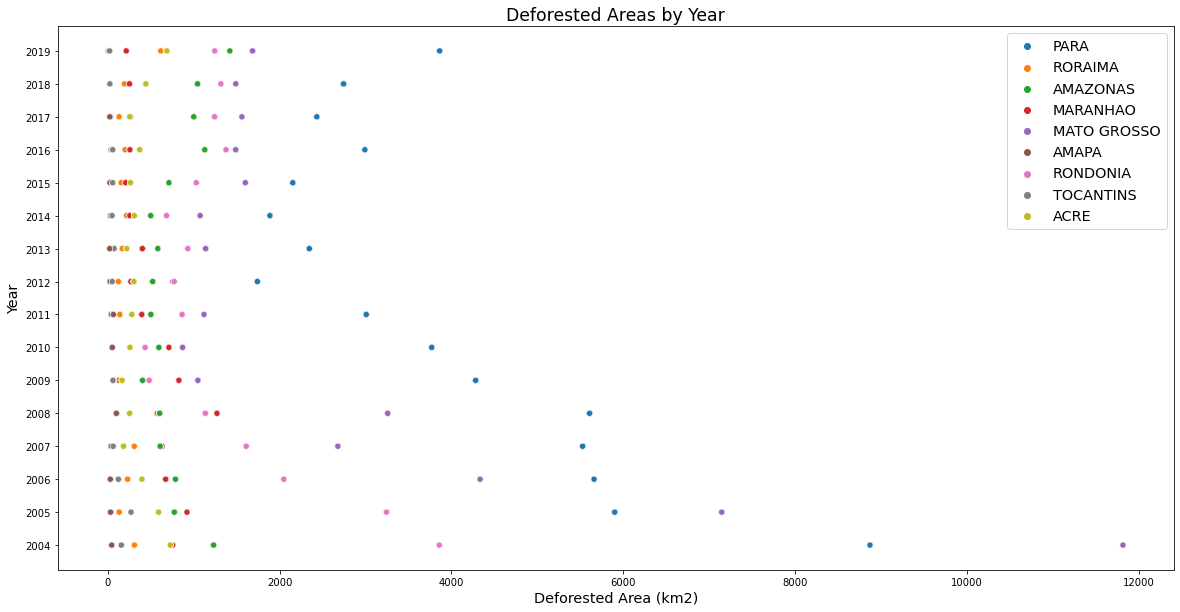

In [23]:
plt.figure(figsize=(20,10))
year2 = range(2004,2020) ## Sets the range from 2004 to 2020 on year2. I will use it below.

sns.scatterplot(data=degredation_brazil, x="deforested_area",y="year",hue="state")

plt.title("Deforested Areas by Year" ,size="xx-large")
plt.xlabel("Deforested Area (km2)" ,size="x-large")
plt.ylabel("Year" ,size="x-large")
plt.yticks(year2)
plt.legend(fontsize='x-large', title_fontsize='40')

#### 2.2.2 Per State and Year Analysis

Text(0, 0.5, 'State')

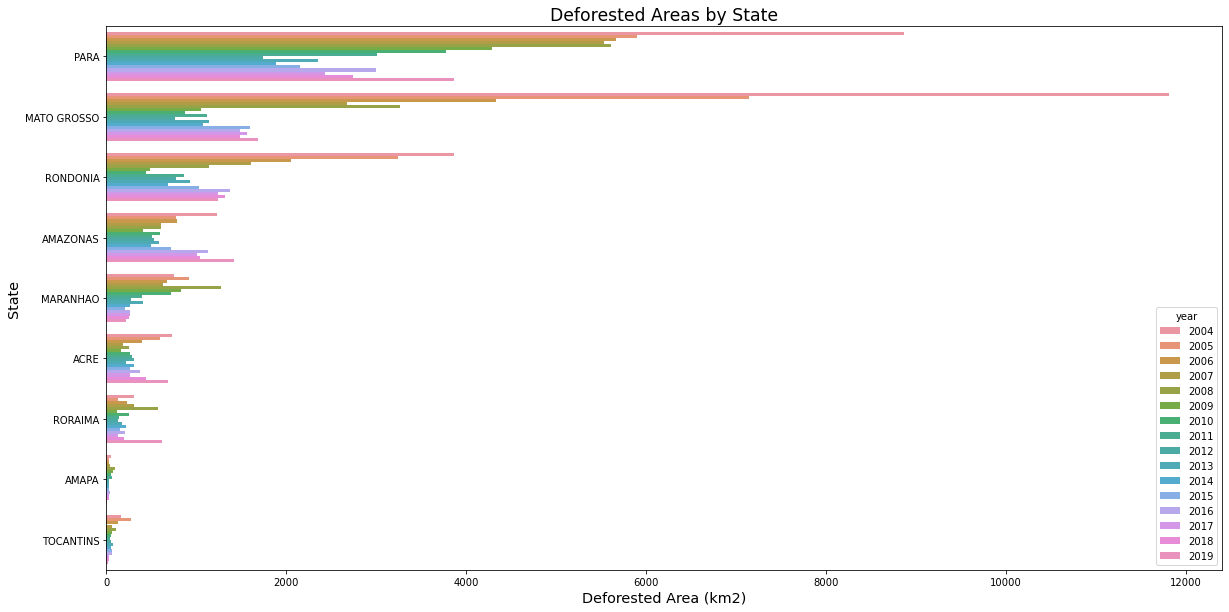

In [24]:
plt.figure(figsize=(20,10))

sns.barplot(data=degredation_brazil, x="deforested_area",y="state", order=sorted_states, hue="year")

plt.title("Deforested Areas by State" ,size="xx-large")
plt.xlabel("Deforested Area (km2)" ,size="x-large")
plt.ylabel("State" ,size="x-large")

#### 2.2.2 Per State and Year Analysis

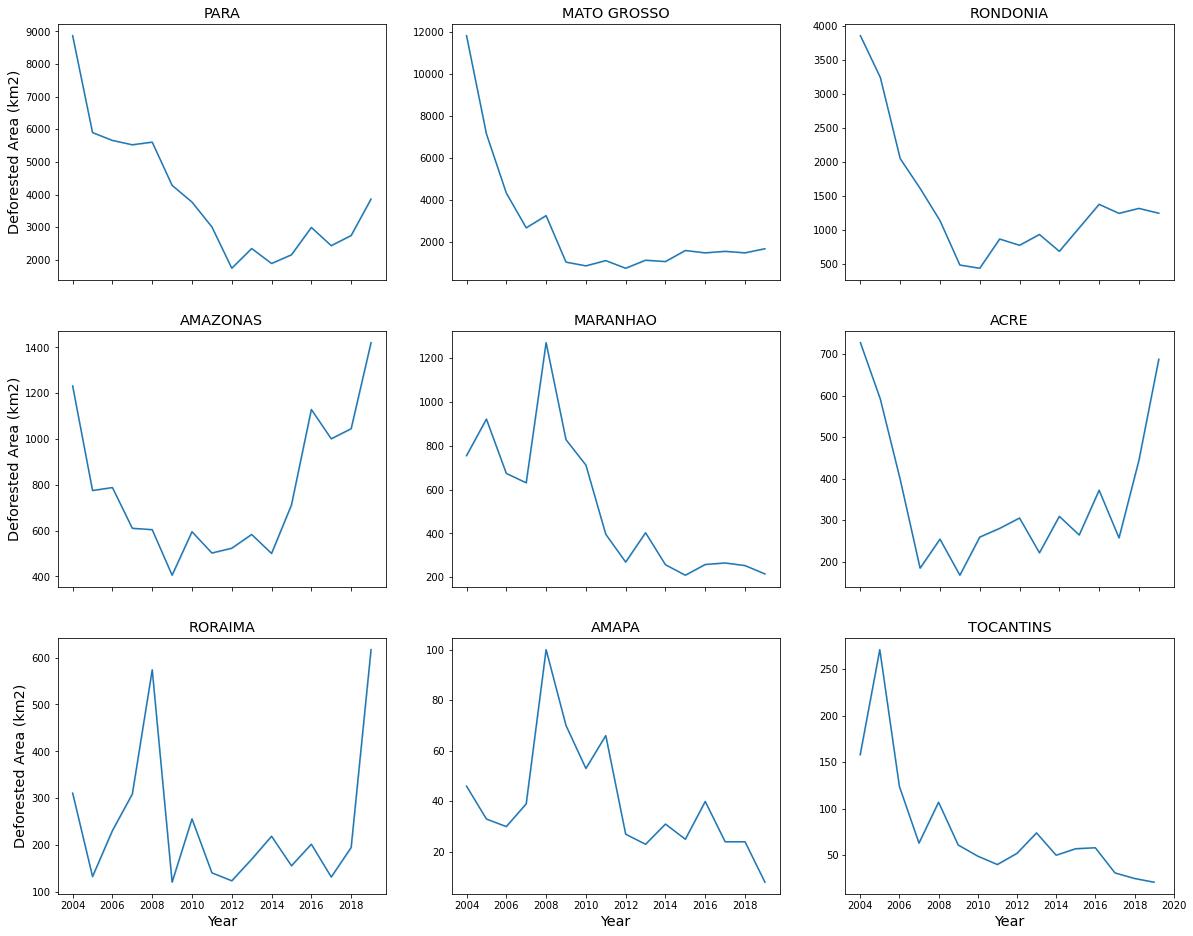

In [170]:
fig, ax = plt.subplots(3,3 ,figsize=(20, 16), sharex= True)
ax = ax.flat
i=0

for x in sorted_states:
    sns.lineplot(data=degredation_brazil[degredation_brazil['state'] == x] ,x='year', y='deforested_area', ax=ax[i])
    
    ax[i].set_title(x, size='x-large')
    ax[i].set_xlabel("Year", size='x-large')
    ax[i].set_xticks([2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020])
   
    if i==0 or i==3 or i==6:
        ax[i].set_ylabel("Deforested Area (km2)", size='x-large')
    else:
        ax[i].set_ylabel("")
    
    i += 1
    
## The above line of code uses python logic to ensure that Y Labels are not duplicated for each graph.
## Otherwise it would look too cluttered.

## 3. Comparison

### 3.1 Firespottings vs Deforesation

C:\Users\EoinD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Fire Spottings vs Deforested Area 2000 - 2020')

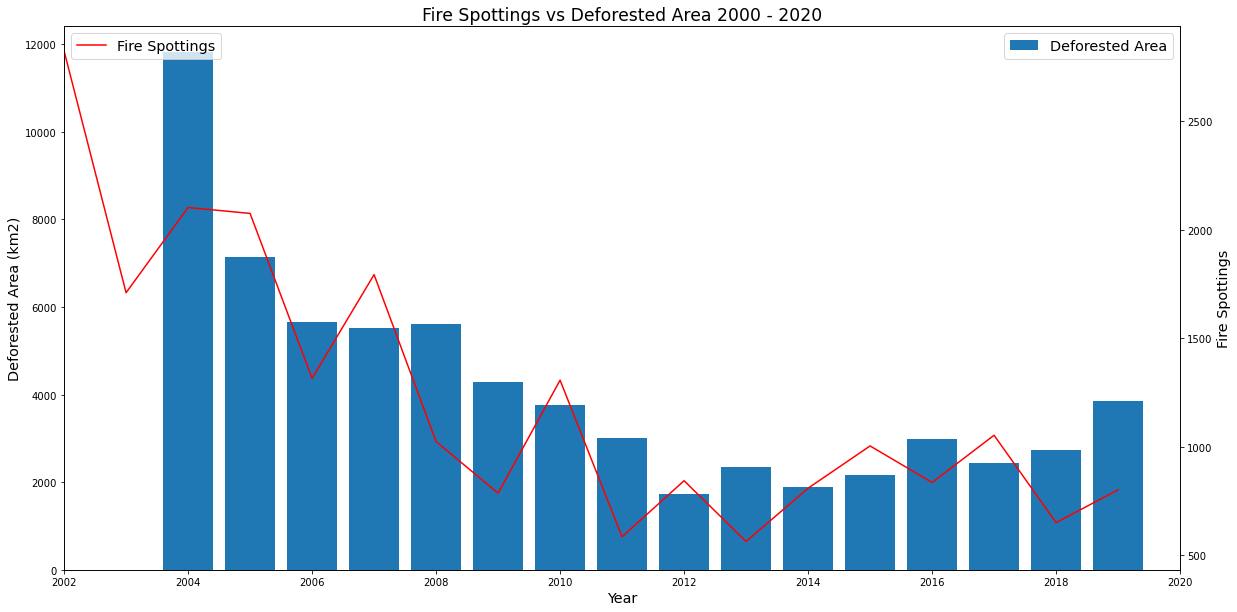

In [171]:
fig, ax = plt.subplots(figsize=(20,10))

## Plotting Bar Chart for Deforesation
ax.bar(degredation_brazil['year'], degredation_brazil['deforested_area'], label = 'Deforested Area')
ax.set_ylabel('Deforested Area (km2)', size = 'x-large')
ax.set_xlabel('Year', size = 'x-large')
ax.legend(loc="upper right", fontsize = 'x-large')

## Plotting Line Plot for Firespottings
df2 = ax.twinx()

sns.lineplot(brazilfires['year'],brazilfires['firespots'], label = 'Fire Spottings', ax = df2, color='Red',ci=None)
df2.legend(loc="upper left", fontsize = 'x-large')
df2.set_ylabel('Fire Spottings', size = 'x-large')
df2.set_xlim(2002, 2020)

df2.set_title('Fire Spottings vs Deforested Area 2000 - 2020', size = 'xx-large')

## This overlays two graphics using the twinx and ax commands.
## I receive a warning, but it doesn't appear to affect how I expect the graphic to look.



 ### 3.2 The impact of Brazilian dry season

#### 3.2.1 Cleaning the Data using SQL

In [39]:
import sqlite3
import csv

connection = sqlite3.connect("databases/brazil_precipitation13.db")
cursor = connection.cursor()

create_table = '''CREATE TABLE brazil_precip8(
                State TEXT NOT NULL,
                Annual INTEGER NOT NULL,
                Jan INTEGER NOT NULL,
                Feb INTEGER NOT NULL,
                Mar INTEGER NOT NULL,
                Apr INTEGER NOT NULL,
                May INTEGER NOT NULL,
                Jun INTEGER NOT NULL,
                Jul INTEGER NOT NULL,
                Aug INTEGER NOT NULL,
                Sep INTEGER NOT NULL,
                Oct INTEGER NOT NULL,
                Nov INTEGER NOT NULL,
                Dec INTEGER NOT NULL);
                '''

cursor.execute(create_table)
file = open('datasets/brazil_precipitation_1990_2020.csv')
contents = csv.reader(file)

insert_records = "INSERT INTO brazil_precip8 (State,Annual,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec) VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ? ,?, ?, ?)"
cursor.executemany(insert_records, contents)

select_all = "SELECT * FROM brazil_precip8"
rows = cursor.execute(select_all).fetchall()

connection.execute("DELETE from brazil_precip8 where State='Name Unknown'")
connection.execute("ALTER TABLE brazil_precip8 DROP Annual")

cursor = connection.execute("SELECT * from brazil_precip8")
for r in rows:
    print(r)
    
clients = pd.read_sql('SELECT * FROM brazil_precip8' ,connection)
clients.to_csv('datasets/brazil_precipitation_clean.csv', index=False)
    
connection.close()

('Brazil', 1778.87, 235.24, 225.54, 241.13, 188.13, 135.09, 84.43, 66.1, 53.29, 73.38, 117.29, 159.92, 199.34)
('Sergipe', 844.24, 38.51, 41.3, 54.9, 91.13, 139.72, 136.16, 120.08, 88.33, 47.2, 33.82, 30.29, 22.8)
('Tocantins', 1562.57, 269.66, 239.35, 261.16, 148.51, 50.98, 5.48, 1.8, 4.01, 33.86, 108.38, 202.7, 236.69)
('Ceara', 735.05, 91.67, 121.59, 174.24, 167.59, 86.35, 35.09, 15.85, 5.06, 2.1, 4.24, 8.03, 23.26)
('Name Unknown', 1562.57, 269.66, 239.35, 261.16, 148.51, 50.98, 5.48, 1.8, 4.01, 33.86, 108.38, 202.7, 236.69)
('Distrito Federal', 1491.15, 234.35, 213.64, 240, 114.55, 28.37, 6.93, 1.95, 10.64, 34.86, 115.43, 229.88, 260.54)
('Name Unknown', 883.89, 69, 57.11, 73.22, 88.44, 88.67, 58.56, 71.56, 45.33, 76.11, 88, 81, 86.89)
('Espirito Santo', 1238.55, 161.13, 96.62, 150.64, 91.85, 62.12, 34.39, 34.46, 37.41, 54.85, 103.45, 204.72, 206.92)
('Name Unknown', 883.89, 69, 57.11, 73.22, 88.44, 88.67, 58.56, 71.56, 45.33, 76.11, 88, 81, 86.89)
('Goias', 1564.37, 270.02, 219.7

In [40]:
brazilprecip = pd.read_csv("datasets/brazil_precipitation_clean.csv")
brazilprecip.head()

,State,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Brazil,235.24,225.54,241.13,188.13,135.09,84.43,66.10,53.29,73.38,117.29,159.92,199.34
1,Sergipe,38.51,41.30,54.90,91.13,139.72,136.16,120.08,88.33,47.20,33.82,30.29,22.80
2,Tocantins,269.66,239.35,261.16,148.51,50.98,5.48,1.80,4.01,33.86,108.38,202.70,236.69
3,Ceara,91.67,121.59,174.24,167.59,86.35,35.09,15.85,5.06,2.10,4.24,8.03,23.26
4,Distrito Federal,234.35,213.64,240.00,114.55,28.37,6.93,1.95,10.64,34.86,115.43,229.88,260.54


#### 3.2.2 Mean Precipitation in all of Brazil 1990 - 2020

In [41]:
## We just want to look at Brazilian Mean for our analysis.
brazil_mean_precip2 = brazilprecip[0:1]

Text(0, 0.5, 'Precipitation (mm)')

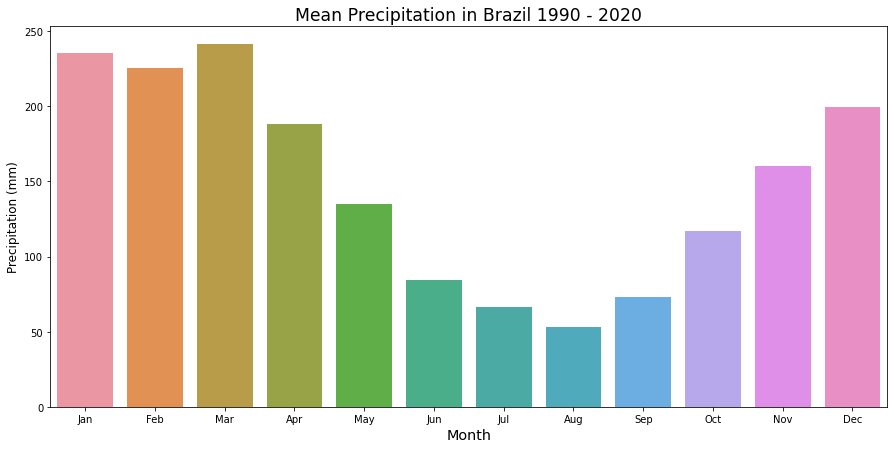

In [46]:
plt.figure(figsize=(15,7))
sns.barplot(data=brazil_mean_precip2)

plt.title("Mean Precipitation in Brazil 1990 - 2020", size="xx-large")
plt.xlabel("Month" ,size="x-large")
plt.ylabel("Precipitation (mm)" ,size="large")

In [55]:
## Cleaning up the file with pandas to correctly display in graph
brazil_mean_precip3 = brazil_mean_precip2.drop(columns=['State'])
brazil_mean_precip4 = brazil_mean_precip3.T
brazil_mean_precip = brazil_mean_precip4.reset_index(drop=False)
brazil_mean_precip.columns = ['Month','Precipitation']

#### 3.2.2 Brazilian Dry Seasons vs Number of Fire Spottings

Text(0.5, 1.0, 'Brazilian Dry Seasons vs Fire Spottings')

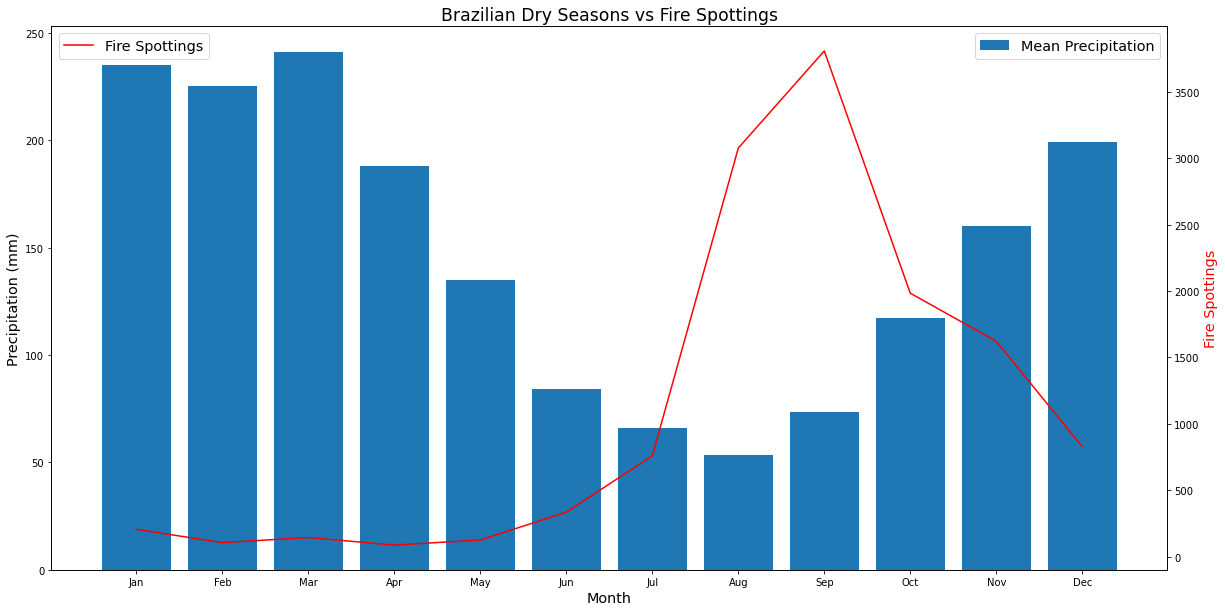

In [59]:
fig, ax = plt.subplots(figsize=(20,10))

month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

ax.bar(brazil_mean_precip['Month'], brazil_mean_precip['Precipitation'], label = 'Mean Precipitation')
ax.set_ylabel('Precipitation (mm)', size = 'x-large')
ax.set_xlabel('Month', size = 'x-large')
ax.legend(loc="upper right", fontsize = 'x-large')

df2 = ax.twinx()
 
sns.lineplot(data=brazilfires, x='month', y='firespots',ax=df2, label = "Fire Spottings", color='Red',ci=None, sort=False)
df2.legend(loc="upper left", fontsize = 'x-large')
df2.set_ylabel('Fire Spottings', size = 'x-large', color='Red')
df2.set_title('Brazilian Dry Seasons vs Fire Spottings', size = 'xx-large')

## 4. Machine Learning and Modelling

### 4.1 Deforestation in Brazilian Rainforests

In [88]:
degredation_brazil.head()

,year,month,state,latitude,longitude,firespots,deforested_area
0,2004,0,PARA,-2.370078,-50.867593,875.0,8870.0
1,2004,1,PARA,-3.508194,-51.670944,36.0,8870.0
2,2004,2,PARA,-3.461724,-49.875931,29.0,8870.0
3,2004,3,PARA,-3.256098,-52.223689,61.0,8870.0
4,2004,4,PARA,-3.472446,-49.818306,193.0,8870.0


In [125]:
degredation_brazil.corr()
deforest = degredation_brazil[['year','deforested_area']]
## I just want to look at Year and Deforested Areas, not states or firespots etc.

In [141]:
X = deforest.iloc[:, 0].values.reshape(-1, 1)
Y = deforest.iloc[:, 1].values.reshape(-1, 1) 
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y) 
Y_pred = linear_regressor.predict(X)  
## Making my prediction model.

In [154]:
linear_regressor.score(X, Y) 
## Checking my prediction score

0.07189305307239247

In [155]:
linear_regressor.predict(X)

array([[1930.55003243],
       [1930.55003243],
       [1930.55003243],
       ...,
       [ 390.48164878],
       [ 390.48164878],
       [ 390.48164878]])

In [156]:
linear_regressor.predict([[2022]])
## Predicting the deforested area in 2022.

array([[82.46797206]])

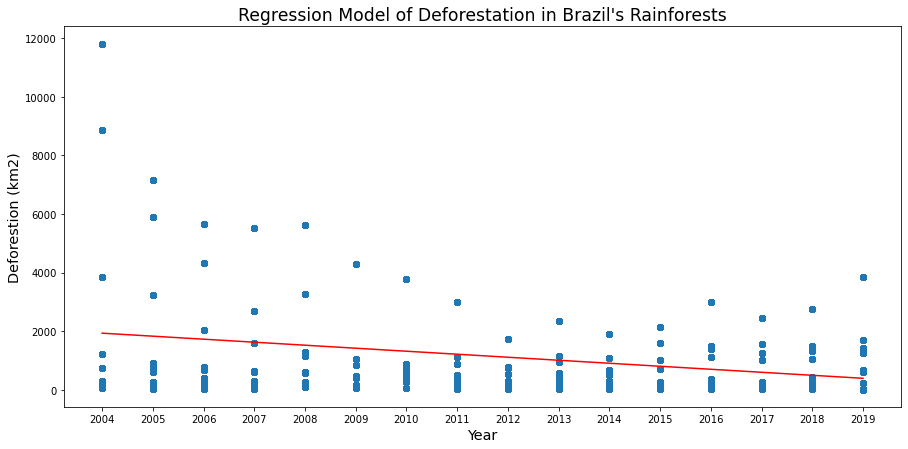

In [158]:
plt.figure(figsize=(15,7))
year3 = range(2004,2024)

plt.title("Regression Model of Deforestation in Brazil's Rainforests" ,size="xx-large")
plt.xlabel("Year" ,size="x-large")
plt.ylabel("Deforestion (km2)" ,size="x-large")
plt.xticks(year2)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
##This displays my prediction model from 2004 - 2005